# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [27]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [28]:
# Calculate mean
math_mean = data['math score'].mean()
reading_mean = data['reading score'].mean()
writing_mean = data['writing score'].mean()

# Calculate standard deviation
math_std = data['math score'].std()
reading_std = data['reading score'].std()
writing_std = data['writing score'].std()

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.16308009600945
Mean Reading Score: 69.169, Std: 14.600191937252216
Mean Writing Score: 68.054, Std: 15.19565701086965


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [29]:
# Calculate probabilities
p_male = len(data[data['gender'] == 'male']) / len(data)
p_math_above_80 = len(data[data['math score'] > 80 ]) / len(data)
p_male_and_math_above_80 = p_male * p_math_above_80

# Union probability
p_union = (p_male + p_math_above_80) - p_male_and_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")

Probability of Male or Math Score > 80: 0.5731679999999999


Calculate the probability that a student is Male and has a Math_Score above 80.

In [30]:
# Calculate probabilities
p_male = len(data[data['gender'] == 'male']) / len(data)
p_math_above_80 = len(data[data['math score'] > 80 ]) / len(data)
p_male_and_math_above_80 = p_male * p_math_above_80

# Union probability
p_intersection = p_male * p_math_above_80
print(f"Probability of Male and Math Score > 80: {p_intersection}")

Probability of Male and Math Score > 80: 0.08483199999999999


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [31]:
# Calculate conditional probability using Bayes' theorem
p_male_given_math_above_80 = p_intersection * p_male / p_math_above_80
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.232324


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

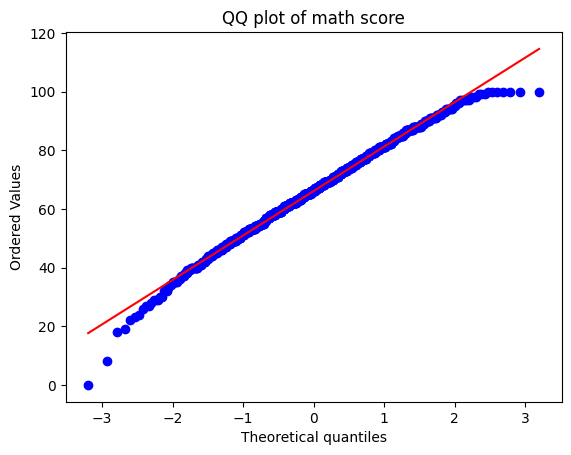

In [32]:
# QQ plot 
Math_Score = data['math score']
stats.probplot(Math_Score, dist="norm", plot=plt)
plt.title('QQ plot of math score')
plt.show()

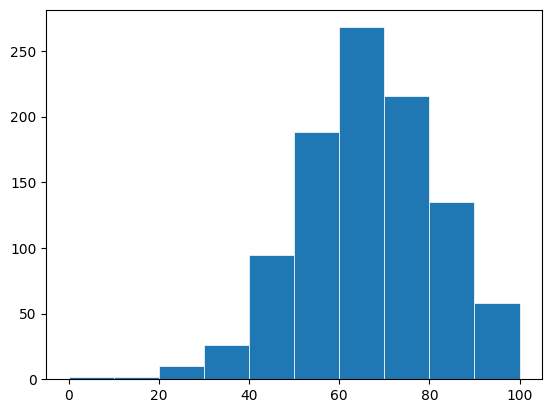

In [34]:
# Histogram
Math_Score = data['math score']
plt.hist(Math_Score, bins=10, linewidth=0.5, edgecolor="white")
plt.show()

In [37]:
# Shapiro-Wilk test
Math_Score = data['math score']
statistic, p_value = stats.shapiro(Math_Score)
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( 'نمره‌های ریاضی از توزیع نرمال پیروی نمی‌کنند')
else:
    print( 'نمره‌های ریاضی از توزیع نرمال پیروی می‌کنند')

Shapiro-Wilk Test for Math Score: Statistic = 0.9931513872437832, p-value = 0.00014545719606603633
T-statistic: 0.9931513872437832, p-value: 0.00014545719606603633
نمره‌های ریاضی از توزیع نرمال پیروی نمی‌کنند


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [38]:
# Calculate z-scores
Math_Score = data['math score']
mean_math_score = sum(Math_Score) / len(Math_Score)
std_math_score = (sum((x - mean_math_score) ** 2 for x in Math_Score) / len(Math_Score - 1)) ** 0.5
data['Math_Score_z'] = (Math_Score - mean_math_score) / std_math_score
print(data['Math_Score_z'])

# Remove noise
threshold = 2.6
cleaned_data = data[np.abs(data['Math_Score_z']) < threshold]
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")

0      0.390024
1      0.192076
2      1.577711
3     -1.259543
4      0.653954
         ...   
995    1.445746
996   -0.269803
997   -0.467751
998    0.126093
999    0.719937
Name: Math_Score_z, Length: 1000, dtype: float64
Original data shape: (1000, 9)
Cleaned data shape: (992, 9)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

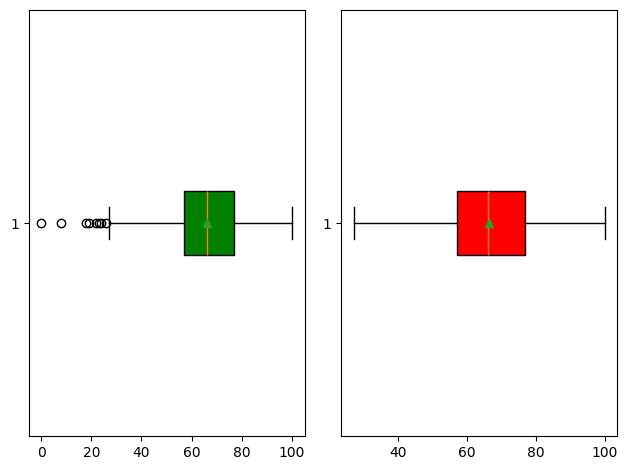

In [39]:
# Box plot
Math_Score = data['math score']

plt.subplot(1,2,1)
plt.boxplot(Math_Score,vert=False,patch_artist=True,boxprops = dict(facecolor = 'green'),showmeans=True)


plt.subplot(1,2,2)
plt.boxplot(cleaned_data['math score'],vert=False,patch_artist=True,boxprops = dict(facecolor = 'red'),showmeans=True)
plt.tight_layout()
plt.show()


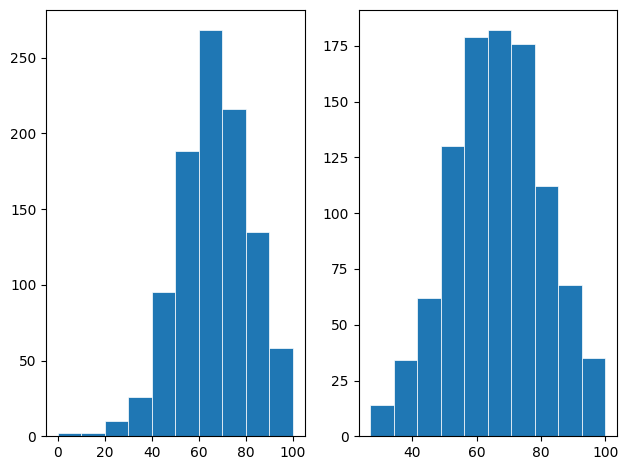

In [45]:
# Histogram
Math_Score = data['math score']
plt.subplot(1,2,1)
plt.hist(Math_Score, bins=10,linewidth=0.5, edgecolor="white")

plt.subplot(1,2,2)
plt.hist(cleaned_data['math score'], bins=10,linewidth=0.5, edgecolor="white")
plt.tight_layout()
plt.show()


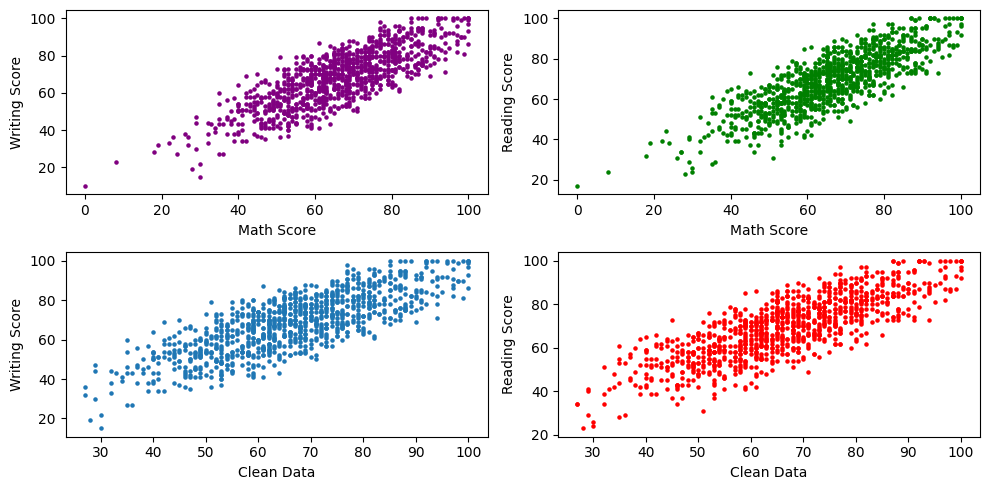

In [42]:
# Scatter plot
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0, 0].scatter(data['math score'], data['writing score'],c ="purple",linewidths = 1,s =5)
axs[0, 0].set_xlabel('Math Score')
axs[0, 0].set_ylabel('Writing Score')

axs[0, 1].scatter(data['math score'], data['reading score'],c ="green",linewidths = 1,s =5)
axs[0, 1].set_xlabel('Math Score')
axs[0, 1].set_ylabel('Reading Score')

axs[1, 0].scatter(cleaned_data['math score'], cleaned_data['writing score'],linewidths = 1,s =5)
axs[1, 0].set_xlabel('Clean Data')
axs[1, 0].set_ylabel('Writing Score')

axs[1, 1].scatter(cleaned_data['math score'], cleaned_data['reading score'],c ="red",linewidths = 1,s =5)
axs[1, 1].set_xlabel('Clean Data')
axs[1, 1].set_ylabel('Reading Score')

plt.tight_layout()
plt.show()

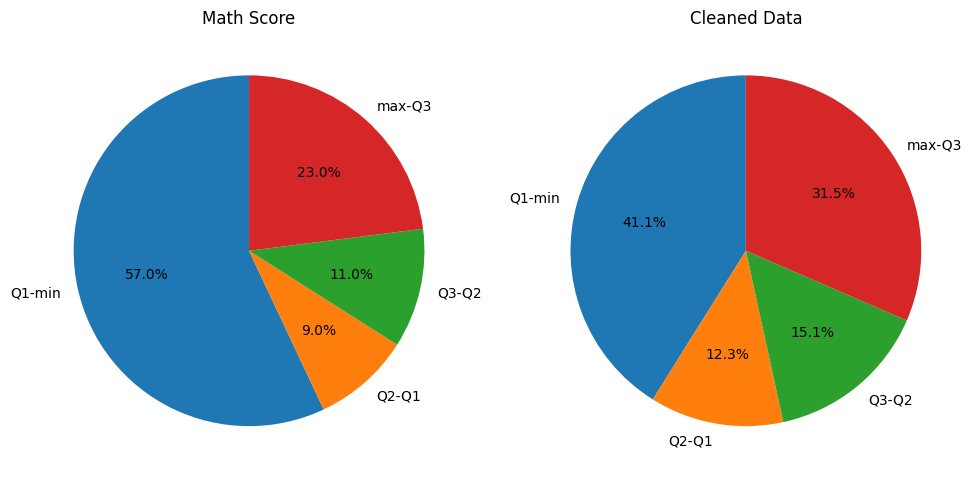

In [43]:
# Pie chart
math_score = data['math score']

Q1_math_score = np.percentile(math_score, 25)
Q2_math_score = np.percentile(math_score, 50)
Q3_math_score = np.percentile(math_score, 75)
min_math_score = np.min(math_score)
max_math_score = np.max(math_score)

math_categories = [Q1_math_score - min_math_score, Q2_math_score - Q1_math_score, Q3_math_score - Q2_math_score,
                   max_math_score - Q3_math_score]
math_score_labels = ['Q1-min', 'Q2-Q1', 'Q3-Q2', 'max-Q3']

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].pie(math_categories, labels=math_score_labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Math Score')

Q1_cleaned_data = np.percentile(cleaned_data['math score'], 25)
Q2_cleaned_data = np.percentile(cleaned_data['math score'], 50)
Q3_cleaned_data = np.percentile(cleaned_data['math score'], 75)
min_cleaned_data = np.min(cleaned_data['math score'])
max_cleaned_data = np.max(cleaned_data['math score'])

cleaned_data_categories = [Q1_cleaned_data - min_cleaned_data, Q2_cleaned_data - Q1_cleaned_data,
                           Q3_cleaned_data - Q2_cleaned_data, max_cleaned_data - Q3_cleaned_data]
cleaned_data_labels = ['Q1-min', 'Q2-Q1', 'Q3-Q2', 'max-Q3']

axs[1].pie(cleaned_data_categories, labels=cleaned_data_labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Cleaned Data')

plt.tight_layout()
plt.show()

# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [46]:
male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']

t_statistic, p_value = stats.ttest_ind(male_math_score,female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('میانگین نمرات زنان و مردان متفاوت است')
else:
    print( 'میانگین نمرات زنان و مردان متفاوت نیست')

T-statistic: 4.777915036230824, p-value: 2.0390707800348583e-06
میانگین نمرات زنان و مردان متفاوت است


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [47]:
A = cleaned_data[cleaned_data['race/ethnicity'] == 'group A']['math score']
B = cleaned_data[cleaned_data['race/ethnicity'] == 'group B']['math score']
C = cleaned_data[cleaned_data['race/ethnicity'] == 'group C']['math score']

t_statistic, p_value = stats.f_oneway(A,B,C)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( 'تفاوت معنی دار بین نمرات ریاضی در میان گروه های مختلف وجود دارد' )
else:
    print('تفاوت معنی دار بین نمرات ریاضی در میان گروه های مختلف وجود ندارد')


T-statistic: 1.8530754423823188, p-value: 0.15766859958029905
تفاوت معنی دار بین نمرات ریاضی در میان گروه های مختلف وجود ندارد


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

In [48]:
Math_Score = data['math score']
mean_math_score = sum(math_score) / len(math_score)
std_math_score = (sum((x - mean_math_score) ** 2 for x in math_score) / len(math_score - 1)) ** 0.5

z_value = 1.96

lower_bound = mean_math_score - (z_value * std_math_score) / (len(math_score) ** 0.5)
upper_bound = mean_math_score + (z_value * std_math_score) / (len(math_score) ** 0.5)
confidence_interval = (lower_bound, upper_bound)

print(f"95% Confidence interval for mean Math Score: {confidence_interval}")

95% Confidence interval for mean Math Score: (65.14965258509622, 67.02834741490378)
